In [1]:
## Load libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

<ipython-input-1-8e3351685610>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2023MAHE'
    DATA_DIR = DIR + '/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


**Problem-1**: we will reconstruct missing values in a real ECG signal. To that end, first load the ECG signal data and make a component plot of the loaded ECG vector by executing the cell below. Note the missing values:

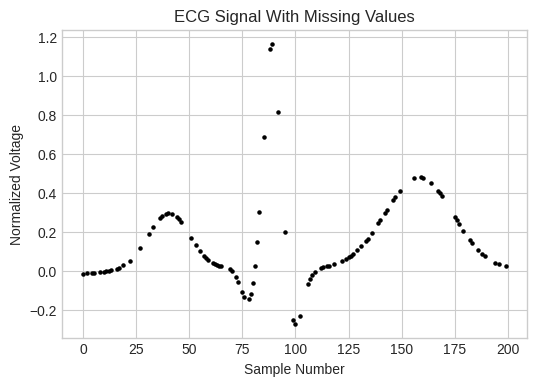

In [3]:
## Load data
FILE =  '/content/ecg_missing.txt'
df_ecg = pd.read_csv(FILE, header = None, names = ['ecgvalues'])
df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)

## Component plot of the ecg signal
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.scatter(component_index, df_ecg['ecgvalues'], color = 'black', marker = 'o', s = 5)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Normalized Voltage')
ax.set_title('ECG Signal With Missing Values');

**Problem-1.1**: extract the indices corresponding to the missing ECG values

In [5]:
indices_unknown = df_ecg[df_ecg['ecgvalues'].isna()].index
indices_unknown

Int64Index([  1,   3,   6,   7,   9,  14,  15,  18,  20,  21,  23,  24,  25,
             26,  28,  29,  30,  32,  34,  35,  38,  41,  43,  47,  48,  49,
             50,  52,  54,  56,  60,  66,  67,  68,  71,  74,  77,  84,  86,
             87,  90,  91,  93,  94,  96,  97,  98, 101, 103, 104, 105, 110,
            111, 114, 117, 119, 120, 121, 123, 128, 130, 132, 135, 137, 138,
            141, 144, 145, 148, 150, 151, 152, 153, 154, 155, 157, 158, 161,
            162, 163, 165, 166, 170, 171, 172, 173, 174, 178, 180, 181, 184,
            185, 187, 190, 191, 192, 193, 195, 197, 198],
           dtype='int64')

**Problem-1.2**: extract the indices corresponding to the known ECG values

In [6]:
indices_known = df_ecg[df_ecg['ecgvalues'].notna()].index
indices_known


Int64Index([  0,   2,   4,   5,   8,  10,  11,  12,  13,  16,  17,  19,  22,
             27,  31,  33,  36,  37,  39,  40,  42,  44,  45,  46,  51,  53,
             55,  57,  58,  59,  61,  62,  63,  64,  65,  69,  70,  72,  73,
             75,  76,  78,  79,  80,  81,  82,  83,  85,  88,  89,  92,  95,
             99, 100, 102, 106, 107, 108, 109, 112, 113, 115, 116, 118, 122,
            124, 125, 126, 127, 129, 131, 133, 134, 136, 139, 140, 142, 143,
            146, 147, 149, 156, 159, 160, 164, 167, 168, 169, 175, 176, 177,
            179, 182, 183, 186, 188, 189, 194, 196, 199],
           dtype='int64')

**Problem-1.3**: build a vector of known ecg signal values

In [7]:
x_known = df_ecg['ecgvalues'].values[indices_known]
x_known


array([-1.4374358e-02, -1.2637355e-02, -1.0812403e-02, -9.8533655e-03,
       -6.5482859e-03, -3.7513235e-03, -2.0578644e-03, -9.4258541e-05,
        2.2061528e-03,  1.1933259e-02,  1.6432082e-02,  2.7900408e-02,
        5.2836413e-02,  1.1955439e-01,  1.8927629e-01,  2.2432987e-01,
        2.6819605e-01,  2.7884396e-01,  2.9247613e-01,  2.9511999e-01,
        2.9169886e-01,  2.7691699e-01,  2.6566740e-01,  2.5236573e-01,
        1.6913212e-01,  1.3481272e-01,  1.0374964e-01,  7.7566183e-02,
        6.6488692e-02,  5.6786325e-02,  4.1356533e-02,  3.5450843e-02,
        3.0563746e-02,  2.6503058e-02,  2.3035374e-02,  7.1758438e-03,
       -1.8258006e-03, -3.2324290e-02, -5.4580566e-02, -1.0887994e-01,
       -1.3214744e-01, -1.4281210e-01, -1.1800725e-01, -6.4454915e-02,
        2.2472551e-02,  1.4558586e-01,  3.0343132e-01,  6.8578156e-01,
        1.1362935e+00,  1.1638875e+00,  8.1561486e-01,  2.0040482e-01,
       -2.4972163e-01, -2.6991059e-01, -2.3291409e-01, -6.9188851e-02,
      

**Probem-1.4**: construct the matrices $S_1$ and $S_2.$

In [8]:
I = np.eye(len(df_ecg))
S1 = I[:, indices_known]
S2 = I[:, indices_unknown]

In [9]:
S1

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
S2

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Problem-1.5**: build the matrix $D$

In [12]:
n = len(df_ecg) # size of the signal
#n = 6
a = 1*np.ones(n-1)
b = -2*np.ones(n)
D = np.diag(a, -1) + np.diag(b) + np.diag(a, 1)
D = D[1:-1, :]
D
D.shape
D


array([[ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.]])

Reconstruct the missing values such that the resulting ECG signal is smooth (we will do this part during the lab session).

In [13]:
A = np.dot(D, S2)
b = -np.dot(D, np.dot(S1, x_known))
values = np.linalg.lstsq(A,b)[0]
values

<ipython-input-13-7bc29eed43d9>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  values = np.linalg.lstsq(A,b)[0]


array([-0.01351183, -0.01173897, -0.00883719, -0.00774259, -0.005233  ,
        0.00491464,  0.00812556,  0.02172347,  0.03505588,  0.04332338,
        0.06372848,  0.07592295,  0.08934318,  0.10391254,  0.1361921 ,
        0.15354526,  0.17133346,  0.20709335,  0.2405311 ,  0.25528913,
        0.28699405,  0.29485713,  0.28565648,  0.23746037,  0.22131781,
        0.20430458,  0.18678718,  0.1517059 ,  0.11875676,  0.09000297,
        0.04843865,  0.02027672,  0.01731919,  0.01325487, -0.01486594,
       -0.08156172, -0.14549183,  0.48949383,  0.87430266,  1.03211926,
        1.10819976,  0.98638922,  0.61303562,  0.40063708,  0.03432442,
       -0.09667572, -0.19166721, -0.26117272, -0.1945408 , -0.15109843,
       -0.10763258,  0.00453474,  0.01056215,  0.02059661,  0.02932771,
        0.03668849,  0.04095327,  0.04567103,  0.05665562,  0.09493746,
        0.11521949,  0.1386097 ,  0.17943424,  0.21010162,  0.22629577,
        0.2773055 ,  0.32976513,  0.34698942,  0.39544276,  0.42

**Problem-2**: consider an $n$-vector $x$ of time series values. The following code snippet simulates such as vector. Try three different cycle frequency values (0.5, 1.0, 2.0) in the variable f below and observe what happens to the component plot of the vector.

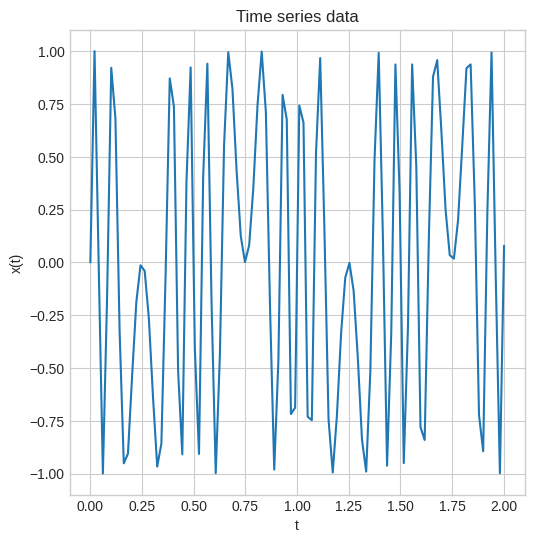

In [16]:
t_start = 0 # start time in sec
t_end = 2 # end time in sec
t = np.linspace(t_start, t_end+1e-03, 100) # timestamps
f = [0.5, 1.0, 2.0] # cycle frequency
for i, f in enumerate(f):
    omega = 2 * np.pi * f # angular frequency
x = np.sin(omega * np.sin(0.5 * omega * t))
fig, ax2 = plt.subplots(1, 1, figsize = (6, 6))
fig.tight_layout(pad = 4.0)
ax2.plot(t, x,)
ax2.set_xlabel('t')
ax2.set_ylabel('x(t)')
ax2.set_title('Time series data');
#for i, f in enumerate(frequencies):
#omega = 2 * np.pi * f # angular frequency
#x = np.sin(omega * np.sin(0.5 * omega * t))

**Problem 2.1**: In order to measure how rough or wiggly a signal represented by a vector is, we measure the so called *Dirichlet energy* of the signal which for the vector $x$ we saw above is defined as:

$$(x_2-x_1)^2+(x_3-x_2)^2+\cdots+(x_{100}-x_{99})^2.$$

Calculate the Dirichlet energy of the vector $x$ for the three different frequency values mentioned above. How do the values compare to each other?

Use the following clue:

Dirichlet energy of $x = \lVert Dx\lVert_2^2,$ where $D$ is the matrix $$\begin{bmatrix}-1 & ? & ? &\cdots&?&?\\0 & ? & 1 &\cdots&?&?\\? & ? & ? &\cdots&?&?\\ &  & \vdots &\vdots&&\\? & ? & ? &\cdots&-1&?\end{bmatrix}.$$

In [17]:
n = 100 # Length of the vector
a = 1 * np.ones(n - 1)
D = np.diag(a, -1) + np.diag(-1 * a, 1)
D[0, 0] = -1
D[n - 1, n - 1] = 1
frequencies = [0.5, 1.0, 2.0]
# Calculate Dirichlet energy for each frequency
for f in frequencies:
    omega = 2 * np.pi * f # Angular frequency
x = np.sin(omega * np.sin(0.5 * omega * t))
# Calculate Dirichlet energy
dirichlet_energy = np.linalg.norm(np.dot(D, x))**2
print(f'Dirichlet energy for f={f} Hz: {dirichlet_energy:.4f}')

Dirichlet energy for f=2.0 Hz: 125.7076
